### 080725 graficos dispersión

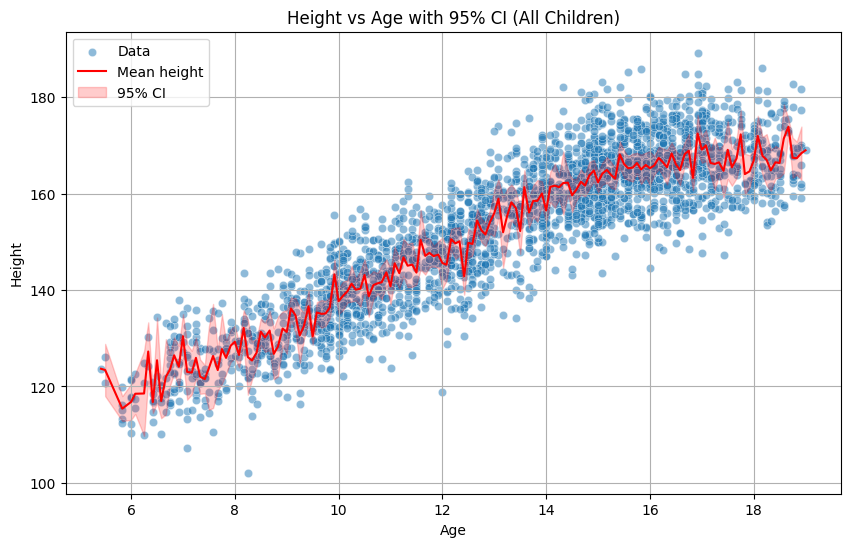

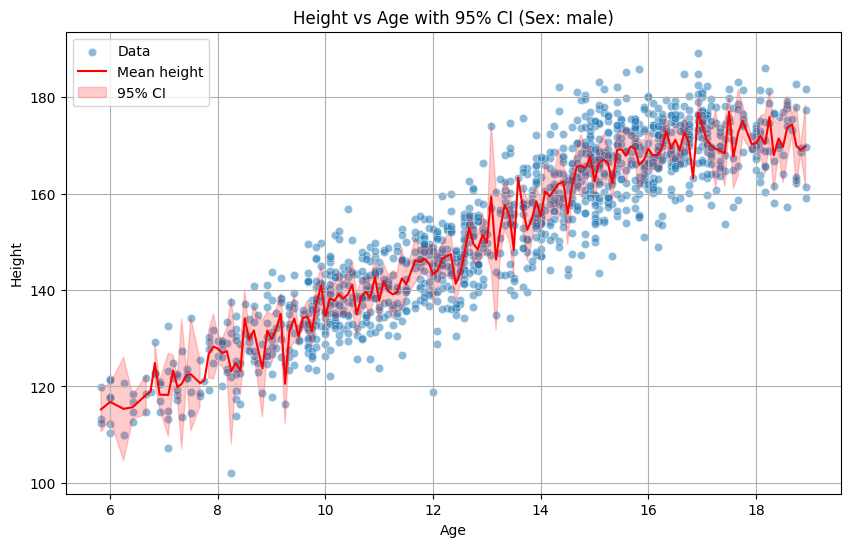

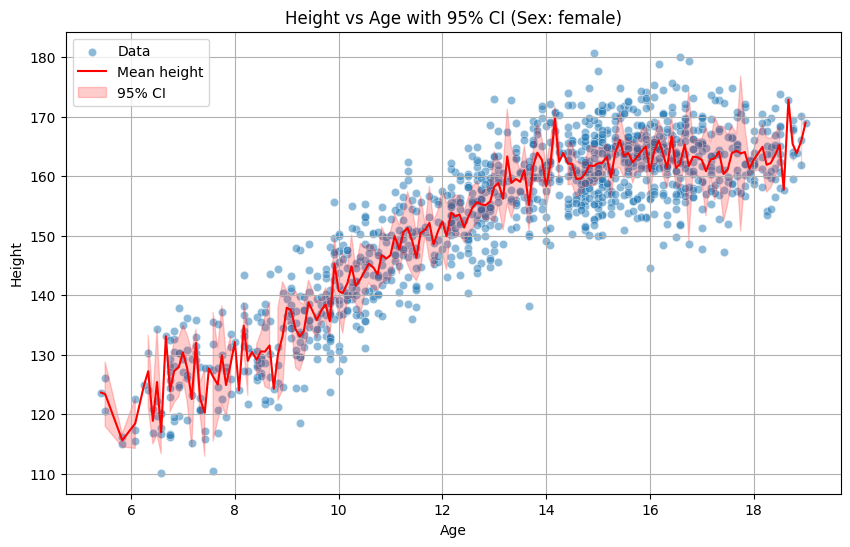

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# Load your dataset
df = pd.read_csv(r"C:\Users\usuario2\Desktop\curso 104\Python\ejemplos python\Ejemplos\Ejemplos\children_height_age.csv")

# Optional: ensure column names are standard
df.columns = [col.strip().lower() for col in df.columns]

# Function to plot scatter with mean and CI
def plot_with_ci(data, title):
    sns.scatterplot(x="age", y="height", data=data, alpha=0.5, label="Data")
    
    # Group by age
    grouped = data.groupby("age")["height"]
    means = grouped.mean()
    counts = grouped.count()
    stds = grouped.std()
    cis = 1.96 * stds / counts.pow(0.5)
    
    plt.plot(means.index, means.values, color="red", label="Mean height")
    plt.fill_between(means.index, means - cis, means + cis, color="red", alpha=0.2, label="95% CI")
    plt.title(title)
    plt.xlabel("Age")
    plt.ylabel("Height")
    plt.legend()
    plt.grid(True)

# Plot for the full dataset
plt.figure(figsize=(10, 6))
plot_with_ci(df, "Height vs Age with 95% CI (All Children)")
plt.show()

# Plot separated by sex
for sex in df["sex"].unique():
    plt.figure(figsize=(10, 6))
    subset = df[df["sex"] == sex]
    plot_with_ci(subset, f"Height vs Age with 95% CI (Sex: {sex})")
    plt.show()


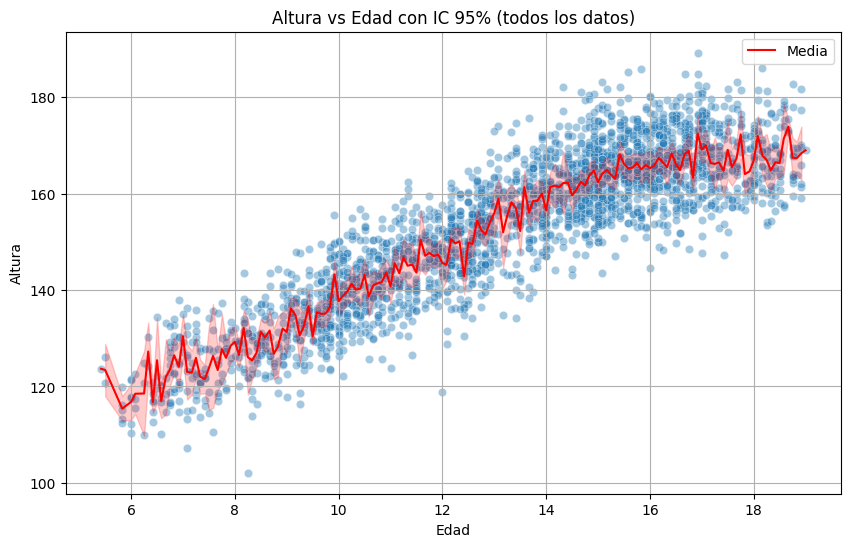

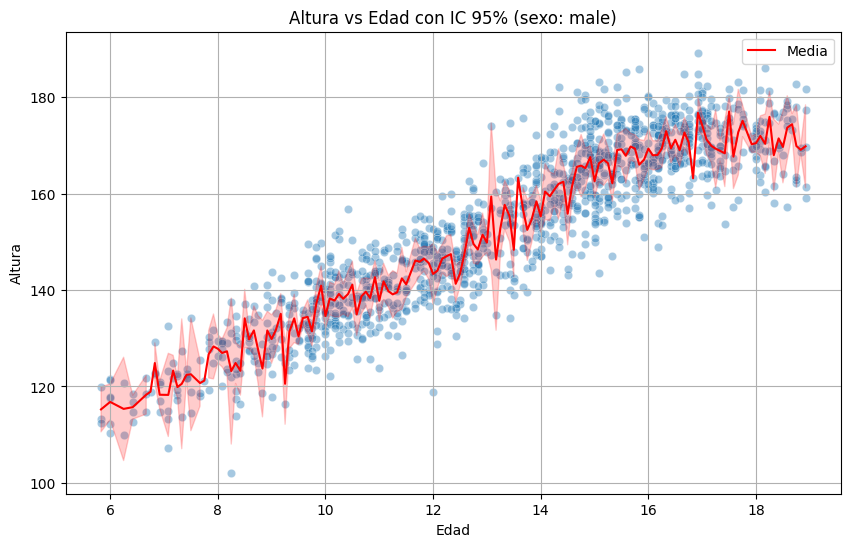

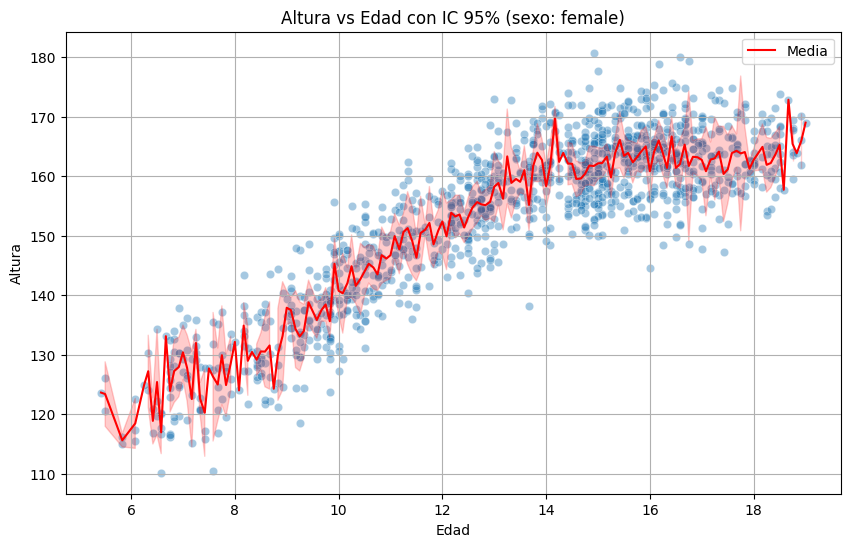

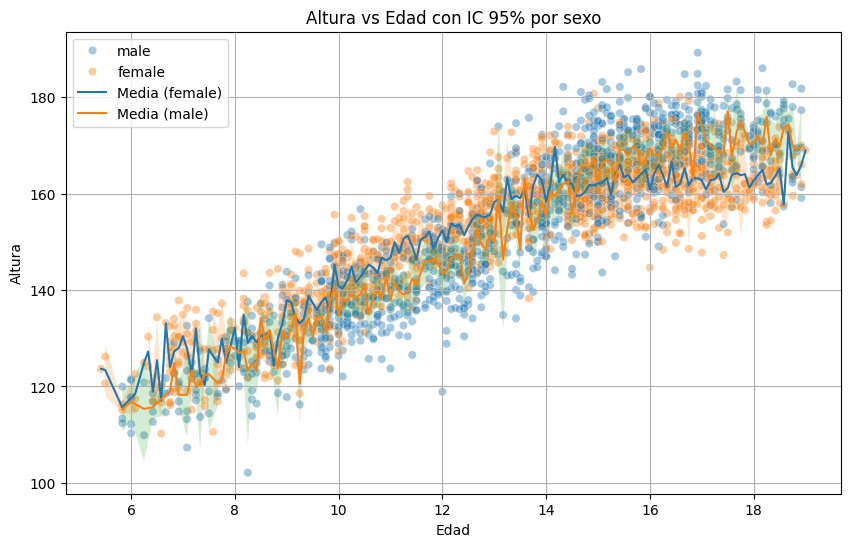

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Cargar el archivo CSV
df = pd.read_csv(r"C:\Users\usuario2\Desktop\curso 104\Python\ejemplos python\Ejemplos\Ejemplos\children_height_age.csv")

# Asegurar nombres estándar de columnas
df.columns = [c.strip().lower() for c in df.columns]

# Función para calcular media y IC 95%
def mean_ci(data):
    mean = data.mean()
    sem = data.sem()
    ci95 = 1.96 * sem  # Z-score 95%
    return pd.Series({'mean': mean, 'ci_lower': mean - ci95, 'ci_upper': mean + ci95})

# Función de trazado
def plot_ci(data, title, hue=None):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=data, x="age", y="height", hue=hue, alpha=0.4, legend="brief")

    if hue:
        grouped = data.groupby(["age", hue])["height"].apply(mean_ci).unstack()
        for sex in grouped.index.levels[1]:
            subset = grouped.xs(sex, level=1)
            plt.plot(subset.index, subset["mean"], label=f"Media ({sex})")
            plt.fill_between(subset.index, subset["ci_lower"], subset["ci_upper"], alpha=0.2)
    else:
        grouped = data.groupby("age")["height"].apply(mean_ci).unstack()
        plt.plot(grouped.index, grouped["mean"], color="red", label="Media")
        plt.fill_between(grouped.index, grouped["ci_lower"], grouped["ci_upper"], color="red", alpha=0.2)

    plt.title(title)
    plt.xlabel("Edad")
    plt.ylabel("Altura")
    plt.legend()
    plt.grid(True)
    plt.show()

# 1. Todos los datos combinados
plot_ci(df, "Altura vs Edad con IC 95% (todos los datos)")

# 2. Separado por sexo (un gráfico por sexo)
for sex in df["sex"].unique():
    subset = df[df["sex"] == sex]
    plot_ci(subset, f"Altura vs Edad con IC 95% (sexo: {sex})")

# 3. Comparando ambos sexos en un solo gráfico
plot_ci(df, "Altura vs Edad con IC 95% por sexo", hue="sex")


In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# Cargar el fichero
df = pd.read_csv(r"C:\Users\usuario2\Desktop\curso 104\Python\ejemplos python\Ejemplos\Ejemplos\children_height_age.csv")

def detectar_outliers(df_subset, descripcion=""):
    X = df_subset[["age"]]
    y = df_subset["height"]

    # Ajustar el modelo
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)

    # Calcular residuos
    residuos = y - y_pred
    media = residuos.mean()
    std_dev = residuos.std()

    # Límites de control
    lcl = media - 3 * std_dev
    ucl = media + 3 * std_dev

    # Identificar outliers
    outliers = df_subset[(residuos < lcl) | (residuos > ucl)].copy()
    outliers["residuo"] = residuos[(residuos < lcl) | (residuos > ucl)]

    print(f"\nCasos atípicos ({descripcion}):")
    print(outliers)

    return outliers

# 1. Modelo general
outliers_general = detectar_outliers(df, "Todos los datos")

# 2. Solo varones
outliers_male = detectar_outliers(df[df["sex"] == "male"], "Male")

# 3. Solo mujeres
outliers_female = detectar_outliers(df[df["sex"] == "female"], "Female")



Casos atípicos (Todos los datos):
         sex  height    age    residuo
717     male  102.08   8.25 -29.031722
1618  female  147.26  17.42 -24.097043
2033    male  118.89  12.00 -28.679732
2198    male  182.19  14.33  24.394358

Casos atípicos (Male):
       sex  height    age    residuo
17    male  159.13  18.92 -22.742301
661   male  173.98  13.08  21.945963
717   male  102.08   8.25 -25.276158
1205  male  157.34  18.58 -22.795142
2033  male  118.89  12.00 -27.626002
2198  male  182.19  14.33  23.769348

Casos atípicos (Female):
         sex  height    age    residuo
321   female  180.76  14.92  21.374390
1450  female  110.56   7.58 -21.700268
1618  female  147.26  17.42 -21.364486
